In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


# Cargando Datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df_2015 = pd.read_csv("/kaggle/input/world-happiness/2015.csv")
df_2015

df_2016 = pd.read_csv("/kaggle/input/world-happiness/2016.csv")
df_2016

df_2017 = pd.read_csv("/kaggle/input/world-happiness/2017.csv")
df_2017

df_2018 = pd.read_csv("/kaggle/input/world-happiness/2018.csv")
df_2018

df_2019 = pd.read_csv("/kaggle/input/world-happiness/2019.csv")
df_2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [4]:
print(df_2015.shape)
print(df_2016.shape)
print(df_2017.shape)
print(df_2018.shape)
print(df_2019.shape)

(158, 12)
(157, 13)
(155, 12)
(156, 9)
(156, 9)


In [5]:
df_2015.columns.to_list()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [6]:
df_2016.columns.to_list()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Lower Confidence Interval',
 'Upper Confidence Interval',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [7]:
df_2017.columns.to_list()

['Country',
 'Happiness.Rank',
 'Happiness.Score',
 'Whisker.high',
 'Whisker.low',
 'Economy..GDP.per.Capita.',
 'Family',
 'Health..Life.Expectancy.',
 'Freedom',
 'Generosity',
 'Trust..Government.Corruption.',
 'Dystopia.Residual']

In [8]:
df_2018.columns.to_list()

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [9]:
df_2019.columns.to_list()

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

Los datos del 2018 y 2019 tienen las mismas variables, además de que son las más actuales, debido a eso trataremos con estas 2 bases de datos para el análisis.

In [10]:
df = pd.DataFrame()
df = df_2018.copy()
df = df.append(df_2019,ignore_index=True)
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
307,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
308,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
309,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
310,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [11]:
df.columns.to_list()

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [12]:
df.columns = ['Ranking','País o Región','Puntaje','PIB per cápita','Apoyo Social','Expectativa de vida saludable','Libertad para tomar decisiones en la vida','Generosidad','Percepción de Corrupción']
df.columns.to_list()

['Ranking',
 'País o Región',
 'Puntaje',
 'PIB per cápita',
 'Apoyo Social',
 'Expectativa de vida saludable',
 'Libertad para tomar decisiones en la vida',
 'Generosidad',
 'Percepción de Corrupción']

In [13]:
df.shape

(312, 9)

# 1. Introducción

 En el dataset a estudiar contamos con las siguientes variables:
 
* Ranking
* País o Región
* Puntaje
* PIB per cápita
* Apoyo Social
* Expectativa de vida saludable
* Libertad para tomar decisiones en la vida
* Generosidad
* Percepción de Corrupción

Ahora para analizar sobre la felicidad de la población, muchas veces asumimos variables que podrían influir en la felicidad de la población como la generosidad de las personas, la corrupción percibida o la libertad para tomar desiciones en la vida, pero en este análisis demostraremos que tal vez la intuición puede fallarnos y demostraremos con números las variables más influyentes sobre la felicidad de las personas y además encontraremos variables que intuitivamente pensaríamos que influye en la felicidad, pero en la realidad no lo hace.

<img src="https://imagenes.iberoeconomia.es/wp-content/uploads/2018/03/20125134/Paises-m%C3%A1s-felices-de-Am%C3%A9rica-Latina--737x413.jpg">

# 2. Análisis sobre el Dataset

### Tipos de datos de todas las características

En este dataset contamos con 8 variables numéricas y 1 categórica.

In [14]:
df.dtypes

Ranking                                        int64
País o Región                                 object
Puntaje                                      float64
PIB per cápita                               float64
Apoyo Social                                 float64
Expectativa de vida saludable                float64
Libertad para tomar decisiones en la vida    float64
Generosidad                                  float64
Percepción de Corrupción                     float64
dtype: object

### Veremos los valores únicos de cada variables

Analizamos los valores únicos

In [15]:
for i in df.columns:
    print("*"*80)
    print("*"*80)
    print(i)
    print(df[i].sort_values().unique())

********************************************************************************
********************************************************************************
Ranking
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156]
********************************************************************************
********************************************************************************
País o Región
['Afghanistan' 'Alba

### Distribución de datos del Puntaje

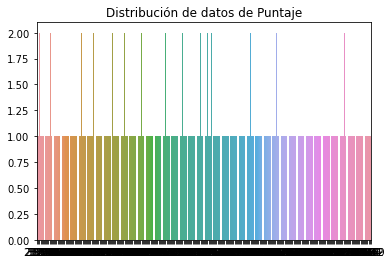

In [16]:
datos_x = df.Puntaje.value_counts().index.to_list()
datos_y = df.Puntaje.value_counts().to_list()

plt.title('Distribución de datos de Puntaje')
sns.barplot(x=datos_x, y=datos_y)
plt.show()

# 3. Limpieza de Datos

In [17]:
df.isnull().sum()

Ranking                                      0
País o Región                                0
Puntaje                                      0
PIB per cápita                               0
Apoyo Social                                 0
Expectativa de vida saludable                0
Libertad para tomar decisiones en la vida    0
Generosidad                                  0
Percepción de Corrupción                     1
dtype: int64

In [18]:
df[df.isnull().any(1)]

,Ranking,País o Región,Puntaje,PIB per cápita,Apoyo Social,Expectativa de vida saludable,Libertad para tomar decisiones en la vida,Generosidad,Percepción de Corrupción
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [19]:
df[df['País o Región']=='United Arab Emirates']

,Ranking,País o Región,Puntaje,PIB per cápita,Apoyo Social,Expectativa de vida saludable,Libertad para tomar decisiones en la vida,Generosidad,Percepción de Corrupción
19,20,United Arab Emirates,6.774,2.096,0.776,0.670,0.284,0.186,NaN
176,21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182


Imputaremos la percepción de corrupción faltante que pertenece al país Emiratos Árabes Unidos, con un valor perteneciente a otro ranking, ya que estimamos que dicho valor no tendría un cambio muy grande respecto al otro.

In [20]:
df_null = pd.DataFrame()
df_null = df.copy()

df_null.loc[df_null['País o Región']=='United Arab Emirates','Percepción de Corrupción'] = 0.182
df_null[df_null['País o Región']=='United Arab Emirates']

,Ranking,País o Región,Puntaje,PIB per cápita,Apoyo Social,Expectativa de vida saludable,Libertad para tomar decisiones en la vida,Generosidad,Percepción de Corrupción
19,20,United Arab Emirates,6.774,2.096,0.776,0.670,0.284,0.186,0.182
176,21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182


# 4. Análisis Exploratorio de Datos (AED)

## Matriz de gráfico multivariado

Generamos un gráfico multivariado, en el que no contaremos con las variables 'Overall rank' y 'Country or region', debido a que la primera se derivaría de la variable 'Score' y la segunda haría ininteligible el gráfico debido a que es una variable categórica.

In [21]:
import plotly.express as px
fig = px.scatter_matrix(df_null.drop(['País o Región','Ranking'],axis=1),
                        color="Puntaje", height=1300)
fig.show()

## Matriz de Correlación

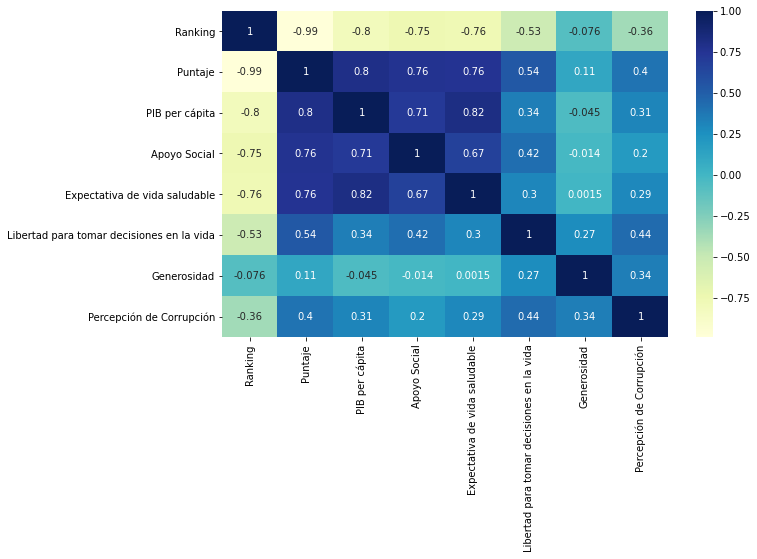

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df_null.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Datos Interesantes:
* **Puntaje vs PIB per cápita**: La relación más significativa es esta, la felicidad percibida por una población se encuentra muy relacionada por el PIB per cápita de un país, esto puede ser debido a que una mejor economía indicaría mejores condiciones de vida para la población de un país.
* **Puntaje vs Apoyo Social**: Otra de las variables que pesa mucho en la felicidad de las personas, es el apoyo social que reciben de parte de su entorno, es decir, que se encuentran muy estimulados por el apoyo de sus amigos, familiares, entorno laboral, etc.
* **Puntaje vs Expectativa de vida saludable**: Esta variable se encuentra igual de relacionada que el "Apoyo Social", la felicidad está fuertemente relacionada a la percepción que tiene una población, acerca de su expectativa de vida saludable.
* **Puntaje vs Libertad para tomar desiciones en la vida**: La influencia entre ambas variables es moderada, es decir, aún no se puede dar una afirmación del por qué de la relación entre ambas variables, ya que paises con más libertad de elección sobre sus vidas, tienen puntajes bajos como Bolivia.

### Datos a agregar:
* **PIB per cápita vs Expectativa de vida saludable**: El PIB per cápita esta fuertemente relacionado por la expectativa de vida saludable de las personas. La expectativa de vida saludable puede ser una consecuencia del PIB per cápita, ya que una mejor producción podría deberse a buenos trabajos en mejores condiciones y mejor pagados, lo que conllevaría a que las personas pudieran optar por vidas más saludables.
* **PIB per cápita vs Apoyo Social**: Mejores oportunidades laborales, la tranquilidad de tener una economía más estable, influirían en el estado emocional de las personas, lo que conllevaría en brindar un mejor apoyo social. 
* **Apoyo Social vs Expectativa de vida saludable**: La relación entre ambas variables pudiera deberse a que un ambiente donde se sienta el apoyo social, propiciaría una buena salud mental, con una mejor expectativa sobre la vida, aumentando la expectativa de vida saludable.

### Nota:
* La felicidad no está influenciada (0.11) por la generosidad de la gente del país.
* La felicidad está muy poco influenciada (0.4) por la percepción de corrupción que tiene la gente sobre el país que reside.

## Gráfico en 3D de las variables más importantes

In [23]:
import plotly.express as px

fig = px.scatter_3d(df_null, x='Apoyo Social', y='Expectativa de vida saludable', z='PIB per cápita',
                    color='Puntaje', opacity=0.7)
fig.show()

# 5. Gráfico de Mapas

## Preparando los datos

In [24]:
df_map = pd.DataFrame()
df_map = df_2019.copy()

In [25]:
import pycountry

def do_fuzzy_search(country):
    try:
        result = pycountry.countries.search_fuzzy(country)
    except Exception:
        return np.nan
    else:
        return result[0].alpha_3
    
df_map.loc[:,'country_code'] = df_map["Country or region"].apply(lambda country: do_fuzzy_search(country))

In [26]:
df_map.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
country_code                    9
dtype: int64

In [27]:
df_map[df_map.isnull().any(1)].sort_values('Country or region')

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,country_code
102,103,Congo (Brazzaville),4.812,0.673,0.799,0.508,0.372,0.105,0.093,NaN
126,127,Congo (Kinshasa),4.418,0.094,1.125,0.357,0.269,0.212,0.053,NaN
98,99,Ivory Coast,4.944,0.569,0.808,0.232,0.352,0.154,0.090,NaN
104,105,Laos,4.796,0.764,1.030,0.551,0.547,0.266,0.164,NaN
63,64,Northern Cyprus,5.718,1.263,1.252,1.042,0.417,0.191,0.162,NaN
109,110,Palestinian Territories,4.696,0.657,1.247,0.672,0.225,0.103,0.066,NaN
53,54,South Korea,5.895,1.301,1.219,1.036,0.159,0.175,0.056,NaN
134,135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135,NaN
38,39,Trinidad & Tobago,6.192,1.231,1.477,0.713,0.489,0.185,0.016,NaN


In [28]:
df_map.loc[df_map['Country or region']=='South Korea','country_code'] = 'KR'
df_map.loc[df_map['Country or region']=='Laos','country_code'] = 'LA'
df_map.loc[df_map['Country or region']=='Trinidad & Tobago','country_code'] = 'TT'
df_map.loc[df_map['Country or region']=='Ivory Coast','country_code'] = 'CI'
df_map.loc[df_map['Country or region']=='Palestinian Territories','country_code'] = 'PS'
df_map.loc[df_map['Country or region']=='Northern Cyprus','country_code'] = 'CY'
df_map.loc[df_map['Country or region']=='Swaziland','country_code'] = 'SZ'
df_map.loc[df_map['Country or region']=='Congo (Brazzaville)','country_code'] = 'CG-BZV'
df_map.loc[df_map['Country or region']=='Congo (Kinshasa)','country_code'] = 'CD-KN'

In [29]:
df_map.columns = ['Ranking','País o Región','Puntaje','PIB per cápita','Apoyo Social','Expectativa de vida saludable','Libertad para tomar decisiones en la vida','Generosidad','Percepción de Corrupción','country_code']
df_map.columns.to_list()

['Ranking',
 'País o Región',
 'Puntaje',
 'PIB per cápita',
 'Apoyo Social',
 'Expectativa de vida saludable',
 'Libertad para tomar decisiones en la vida',
 'Generosidad',
 'Percepción de Corrupción',
 'country_code']

## Graficando mapa

In [30]:
import plotly.graph_objects as go

def mapa(country_code, score, country_name):
    fig = go.Figure(data=go.Choropleth(
        locations = country_code,
        z = score,
        text = country_name,
        colorscale = 'dense',
        autocolorscale=False,
        reversescale=False,
        marker_line_color='black',
        marker_line_width=0.5,
        colorbar_tickprefix = '',
        colorbar_title = score.name,
    ))
    
    fig.update_layout(
        title_text='Ranking de Felicidad 2019 ('+str(score.name)+')',
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        ),
        annotations = [dict(
            x=0.55,
            y=0.1,
            xref='paper',
            yref='paper',
            text=' ',
            showarrow = False
        )]
    )
    fig.show()
    
    return 

In [31]:
mapa(df_map['country_code'],df_map['Puntaje'],df_map['País o Región'])

### El PIB per cápita se encuentra muy relacionado a la felicidad de un país, entonces si lo comparamos con el mapa de puntaje, veremos que ambos tienen mucho parecido.

In [32]:
mapa(df_map['country_code'],df_map['PIB per cápita'],df_map['País o Región'])

### La felicidad no está influenciada por la generosidad!

In [33]:
mapa(df_map['country_code'],df_map['Generosidad'],df_map['País o Región'])

### La felicidad no está influenciada por la percepción de corrupción del país! De hecho, países con alto puntaje en felicidad perciben alta corrupción en sus países como Finlandia, Suecia, Noruega, etc.

In [34]:
mapa(df_map['country_code'],df_map['Percepción de Corrupción'],df_map['País o Región'])

In [35]:
mapa(df_map['country_code'],df_map['Libertad para tomar decisiones en la vida'],df_map['País o Región'])

# 6. Conclusiones

No hay duda de que el **PIB per cápita**, **Apoyo Social** y **Expectativa de vida saludable**, son factores clave para la felicidad de un país, luego le sigue la libertad para tomar desiciones en la vida que tiene influencia moderada sobre la felicidad de un país.

Por otro lado, poniendo en contra nuestra intuición la **generosidad** y **la percepción de corrupción** tienen muy poca influencia sobre la felicidad de las personas, de hecho países con altos índices de felicidad como Finlandia, Noruega, etc. Han tenido pocos índices en **generosidad** y **alta percepción de corrupción** sobre su país.

<img src="https://diariouno.pe/wp-content/uploads/2016/03/1412.jpg">